<!DOCTYPE html>

<!-- saved from url=(0080)https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.YxjrwD1BzIU -->
<html class="js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script src="./main_files/1.txt" type="text/javascript"></script><script src="./main_files/1(1).txt" type="text/javascript"></script><script src="./main_files/moatframe.js.download" type="text/javascript"></script><script async="" src="./main_files/linkid.js.download" type="text/javascript"></script>
<!-- M
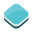

In [1]:
#This will not run on online IDE
import requests
from bs4 import BeautifulSoup
 
#url = "https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168"
# send request to download the data
#response = requests.request("GET", url)
with open("C:/Users/Musad/Desktop/datascience/web2/main.html") as fp:
    data = BeautifulSoup(fp, 'html.parser')

# parse the downloaded data
#data = BeautifulSoup(response.text, 'html.parser')
print(data)

In [2]:
temp=[]  # a list to store quotes
  
table = data.find('div', attrs = {'id':'seven-day-forecast'})
  
for row in table.findAll('div',
                         attrs = {'class':'tombstone-container'}):
    temperature = {}
    temperature['day'] = row.find('p', attrs = {'class':'period-name'}).get_text()
    temperature['desc'] = row.img['alt']
    temperature['short-desc'] = row.find('p', attrs = {'class':'short-desc'}).get_text()
    temperature['high-low'] = row.find('p', attrs = {'class':'temp'}).get_text().split(":")[0]
    temperature['temp'] = row.find('p', attrs = {'class':'temp'}).get_text().split(": ")[1]
    temp.append(temperature)
print(temp)

[{'day': 'ThisAfternoon', 'desc': 'This Afternoon: Sunny, with a high near 79. West southwest wind 7 to 11 mph. ', 'short-desc': 'Sunny', 'high-low': 'High', 'temp': '79 Â°F'}, {'day': 'Tonight', 'desc': 'Tonight: Mostly clear, with a low around 61. West wind 5 to 10 mph becoming light west southwest  in the evening. ', 'short-desc': 'Mostly Clear', 'high-low': 'Low', 'temp': '61 Â°F'}, {'day': 'Thursday', 'desc': 'Thursday: Sunny, with a high near 82. Light southwest wind becoming west 5 to 10 mph in the afternoon. ', 'short-desc': 'Sunny', 'high-low': 'High', 'temp': '82 Â°F'}, {'day': 'ThursdayNight', 'desc': 'Thursday Night: Mostly clear, with a low around 60. West southwest wind 9 to 14 mph becoming light  after midnight. Winds could gust as high as 18 mph. ', 'short-desc': 'Mostly Clear', 'high-low': 'Low', 'temp': '60 Â°F'}, {'day': 'Friday', 'desc': 'Friday: Sunny, with a high near 74. West southwest wind 8 to 13 mph becoming light. ', 'short-desc': 'Sunny', 'high-low': 'High',

In [3]:
import pandas as pd

# create a data frame from the list of dictionaries
dataFrame = pd.DataFrame.from_dict(temp)

# save the scraped data as CSV file
dataFrame.to_csv('C:\\Users\\Musad\\Desktop\\datascience\\temperature_data.csv', index=False)